In [154]:
# Import libraries

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [155]:
# Getting all the stock data (NVR, Lennar, Toll Brothers, Doctor Horton Inc, PulteGroup )
stockSymbols = ['NVR','LEN','TOL','DHI','PHM']

In [156]:
# Getting the stock start date
Stock_dt = '2017-01-01'

# Getting end date
today = datetime.today().strftime('%Y-%m-%d')
today

'2022-06-24'

In [157]:
# Number of assets
num_assets = len(stockSymbols)
print('Comparison between '+str(num_assets)+' assets. NVR and '+str(num_assets-1)+' competitors')

Comparison between 5 assets. NVR and 4 competitors


In [158]:
# creating a fn 
def getMyAssets(stock=stockSymbols, start=Stock_dt,end=today,col='Adj Close'):
    data = pdr.get_data_yahoo(stock, start = start, end=end)[col]
    return data

In [159]:
# Getting the adj. close prices
my_stocks = getMyAssets(stockSymbols)

[*********************100%***********************]  5 of 5 completed


### Getting all the stock data (NVR, Lennar, Toll Brothers, Doctor Horton Inc, PulteGroup )
['NVR','LEN','TOL','DHI','PHM']

In [160]:
my_stocks

,DHI,LEN,NVR,PHM,TOL
Date,,,,,
2017-01-03,25.835611,40.620346,1649.989990,17.271297,29.479631
2017-01-04,26.463699,41.623558,1678.770020,17.680964,30.129299
2017-01-05,26.576185,42.039970,1689.400024,17.625099,29.997486
2017-01-06,26.107468,41.349091,1678.099976,17.187498,29.413727
2017-01-09,26.210588,41.216591,1681.500000,17.252672,29.300743
...,...,...,...,...,...
2022-06-16,61.299999,64.489998,3670.000000,36.270000,41.580002
2022-06-17,60.560001,64.629997,3699.919922,36.250000,41.529999
2022-06-21,61.299999,65.650002,3803.500000,37.169998,42.049999


In [161]:
my_stocks['NVR']

Date
2017-01-03    1649.989990
2017-01-04    1678.770020
2017-01-05    1689.400024
2017-01-06    1678.099976
2017-01-09    1681.500000
                 ...     
2022-06-16    3670.000000
2022-06-17    3699.919922
2022-06-21    3803.500000
2022-06-22    3827.850098
2022-06-23    3941.820068
Name: NVR, Length: 1378, dtype: float64

In [162]:
my_stocks['NVR']

Date
2017-01-03    1649.989990
2017-01-04    1678.770020
2017-01-05    1689.400024
2017-01-06    1678.099976
2017-01-09    1681.500000
                 ...     
2022-06-16    3670.000000
2022-06-17    3699.919922
2022-06-21    3803.500000
2022-06-22    3827.850098
2022-06-23    3941.820068
Name: NVR, Length: 1378, dtype: float64

In [208]:
# Creating a function to visualize the assets
def pltGraph(stocks=stockSymbols,start=Stock_dt,end=today,col='Adj Close'):
    
    # Creating a title for the graph
    title = 'Competitors '+col+' Price History'
    
    # Getting the assets
    my_stocks = getMyAssets(stock=stocks, start=start, end=end, col=col)
    
    # Setting the fig size
    plt.figure(figsize=(16,9))

    # Create Plot

    fig, ax1 = plt.subplots(figsize = (16,9))
      
    
    ax1.plot(my_stocks[['NVR']], color = 'black') 
    ax1.tick_params(axis ='y', labelcolor = 'black',grid_alpha=0.35) 
    ax1.grid(linestyle='--')
    
    # Adding Twin Axes
    
    ax2 = ax1.twinx() 
      
    #ax2.set_ylabel('Y2-axis', color = 'green') 
    ax2.tick_params(axis ='y', labelcolor = 'black') 
    other_stocks = my_stocks.loc[:, my_stocks.columns != 'NVR']
            
    # Looping through each asset and plotting the price
    for c in other_stocks.columns.values:
        ax2.plot(other_stocks[c],label=c)    

    ax1.legend(my_stocks[['NVR']],loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(title)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(col+' Price USD ($)', fontsize=18)
    #plt.legend(other_stocks.columns.values, loc='upper left')
    #plt.legend(loc='upper left')
    plt.show()

[*********************100%***********************]  5 of 5 completed


<Figure size 1152x648 with 0 Axes>

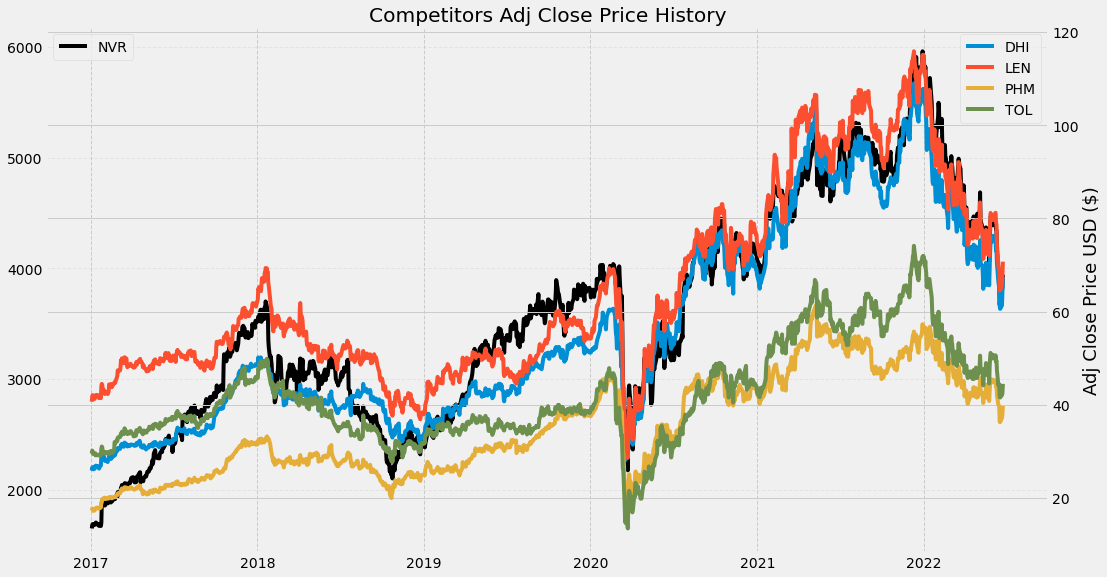

In [209]:
pltGraph(stockSymbols)

In [165]:
# Calculating the simple returns
daily_simple_returns = my_stocks.pct_change(1)
daily_simple_returns

,DHI,LEN,NVR,PHM,TOL
Date,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.024311,0.024697,0.017443,0.023719,0.022038
2017-01-05,0.004251,0.010004,0.006332,-0.003160,-0.004375
2017-01-06,-0.017637,-0.016434,-0.006689,-0.024828,-0.019460
2017-01-09,0.003950,-0.003204,0.002026,0.003792,-0.003841
...,...,...,...,...,...
2022-06-16,-0.063264,-0.064956,-0.061345,-0.080142,-0.063091
2022-06-17,-0.012072,0.002171,0.008153,-0.000551,-0.001203
2022-06-21,0.012219,0.015782,0.027995,0.025379,0.012521


In [166]:
# correlation
daily_simple_returns.corr()

,DHI,LEN,NVR,PHM,TOL
DHI,1.000000,0.889309,0.735303,0.867894,0.796748
LEN,0.889309,1.000000,0.725350,0.878332,0.828798
NVR,0.735303,0.725350,1.000000,0.743502,0.751685
PHM,0.867894,0.878332,0.743502,1.000000,0.842246
TOL,0.796748,0.828798,0.751685,0.842246,1.000000


In [167]:
# covariance
daily_simple_returns.cov()

,DHI,LEN,NVR,PHM,TOL
DHI,0.000561,0.000543,0.000399,0.000509,0.000548
LEN,0.000543,0.000665,0.000429,0.000562,0.000621
NVR,0.000399,0.000429,0.000526,0.000423,0.000501
PHM,0.000509,0.000562,0.000423,0.000614,0.000606
TOL,0.000548,0.000621,0.000501,0.000606,0.000843


In [168]:
# higher the variance, higher the volatility, higher the risk, higher the return
# and vice versa

In [169]:
# variance
daily_simple_returns.var()

DHI    0.000561
LEN    0.000665
NVR    0.000526
PHM    0.000614
TOL    0.000843
dtype: float64

In [170]:
print('Volatility')
daily_simple_returns.std()

Volatility


DHI    0.023678
LEN    0.025797
NVR    0.022938
PHM    0.024782
TOL    0.029043
dtype: float64

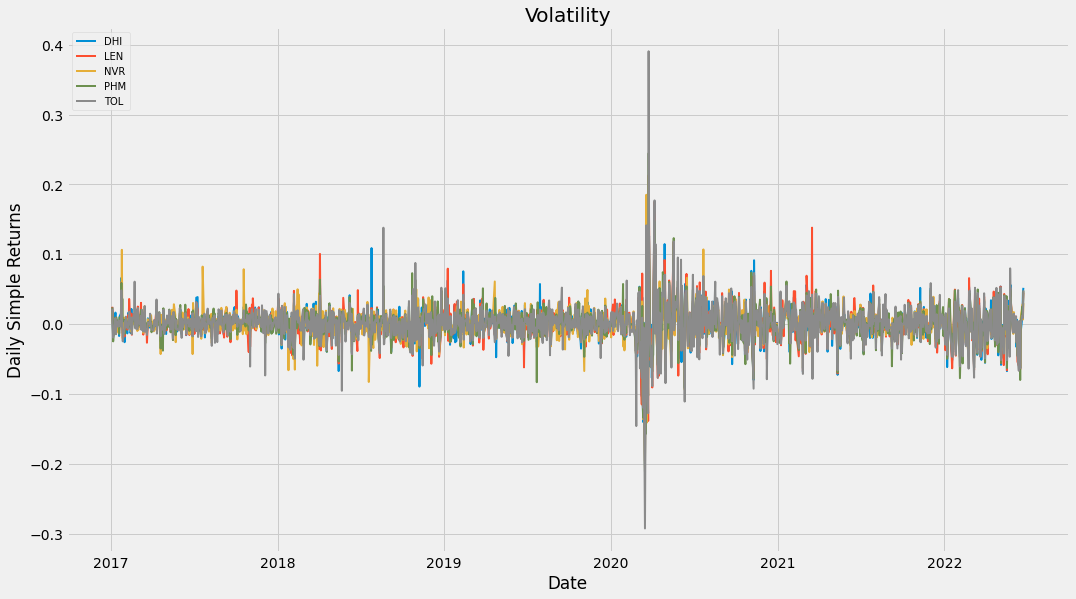

In [171]:
# visualizing the daily simple returns
plt.figure(figsize=(16,9))

# looping through each asset
for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns.index,daily_simple_returns[c], lw=2, label=c)

# creating the legend
plt.legend(loc='upper left',fontsize=10)
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Returns')
plt.show()

In [172]:
# showing the mean of the daily_simple_returns
dailyMeanSimpleReturns = daily_simple_returns.mean()
print('Daily mean simple returns:')
dailyMeanSimpleReturns

Daily mean simple returns:


DHI    0.000979
LEN    0.000735
NVR    0.000895
PHM    0.000913
TOL    0.000718
dtype: float64

In [173]:
# calculating total expected returns from all
randomWeights = np.array([0.1,0.2,0.3,0.1,0.2]) # (10%DHI, 20%LEN, 30%NVR, 10%PHM, 20%TOL)
totalExpectedReturn=np.sum(dailyMeanSimpleReturns*randomWeights)
print("expected daily returns: "+ str(round(totalExpectedReturn*100,5))+'%')

expected daily returns: 0.07484%


In [174]:
# yearly simple return
print("expected annual returns: "+ str(round(totalExpectedReturn*253*100,5))+'%')

expected annual returns: 18.93445%


In [175]:
# calculating the growth of the investment
dailyCumilSimpleRturn = (daily_simple_returns+1).cumprod()
dailyCumilSimpleRturn

,DHI,LEN,NVR,PHM,TOL
Date,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,1.024311,1.024697,1.017443,1.023719,1.022038
2017-01-05,1.028665,1.034949,1.023885,1.020485,1.017567
2017-01-06,1.010523,1.017940,1.017036,0.995148,0.997764
2017-01-09,1.014514,1.014678,1.019097,0.998922,0.993932
...,...,...,...,...,...
2022-06-16,2.372694,1.587628,2.224256,2.100016,1.410465
2022-06-17,2.344051,1.591075,2.242389,2.098858,1.408769
2022-06-21,2.372694,1.616185,2.305165,2.152125,1.426409


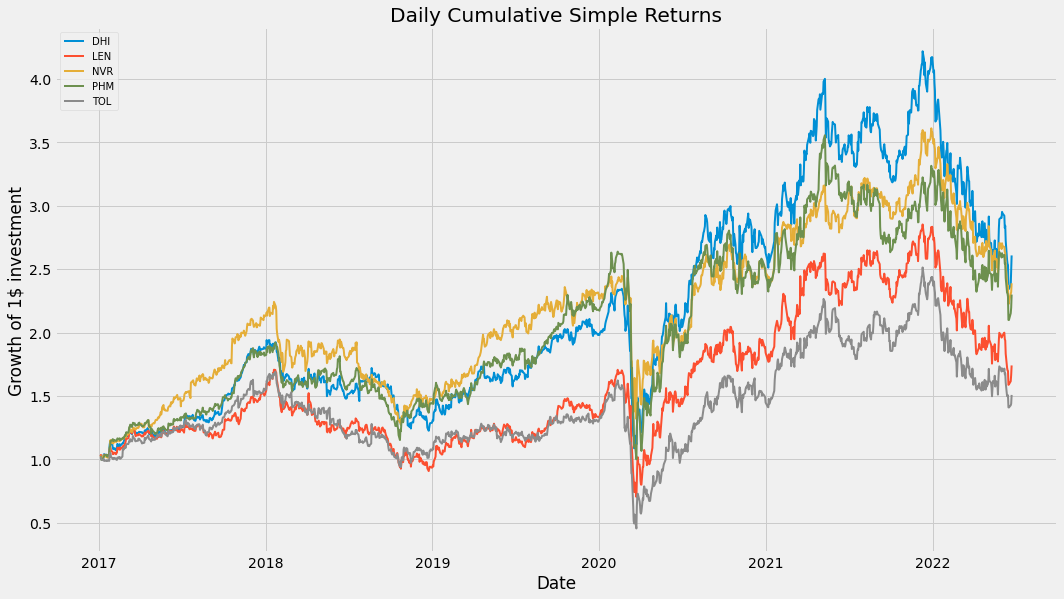

In [176]:
# visualizing the daily simple returns
plt.figure(figsize=(16,9))

# looping through each asset
for c in dailyCumilSimpleRturn.columns.values:
    plt.plot(dailyCumilSimpleRturn.index,dailyCumilSimpleRturn[c], lw=2, label=c)

# creating the legend
plt.legend(loc='upper left',fontsize=10)
plt.title('Daily Cumulative Simple Returns')
plt.xlabel('Date')
plt.ylabel('Growth of 1$ investment')
plt.show()